#### Your name:

<pre> Isaac Aktam</pre>

### Collaborators:

<pre> Ashish Gupta, Konrad Korzeniewski</pre>

In [9]:
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


### Dimesionality Reduction

Q. What is the curse of dimensionality?

The curse of dimensionality refers to the fact that many problems that do not exist in low-dimensional space arise in high-dimensional space. In Machine Learning, one common manifestation is the fact that randomly sampled high-dimensional vectors are generally very sparse, increasing the risk of overfitting and making it very difficult to identify patterns in the data without having plenty of training data. Additionally, it is rather difficult to measure Eucledian distance in a n-dimensional space.

Q. Can PCA be used to reduce the dimensionality of a highly nonlinear dataset?

PCA can be used to significantly reduce the dimensionality of most datasets, even if they are highly nonlinear, because it can at least get rid of useless dimensions. However, if there are no useless dimensions - for example, the Swiss roll - then reducing dimensionality with PCA will lose too much information. You want to unroll the Swiss roll, not squash it.

Q. How can you evaluate the performance of a dimensionality reduction algorithm on your dataset?

Intuitively, a dimensionality reduction algorithm performs well if it eliminates a lot of dimensions from the dataset wihout losing too much information. One way to measure this is to apply the reverse transformation and measure the reconstruction error. However, not all dimensionality reduction algorithms provide a reverse transformation. Alternatively, if you are using dimensionality reduction as a preprocessing step before another Machine Learning algorithm (e.g., Random Forest classifier), then you can simply measure the performance of that second algorithm; if dimensionality reduction did not lose too much information, then the algorithm should perform just as well when using the original dataset.

Q. Load the MNIST dataset (introduced in Chapter 3) and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing). Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set. Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next evaluate the classifier on the test set: how does it compare to the previous classifier?

In [10]:
# Your code here
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [6]:
X_train = mnist['data'][:60000]
y_train = mnist['target'][:60000]

X_test = mnist['data'][60000:]
y_test = mnist['target'][60000:]

In [7]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(random_state=42)

In [8]:
import time

t0 = time.time()
rnd_clf.fit(X_train, y_train)
t1 = time.time()

In [9]:
print("Training took {:.2f}s".format(t1 - t0))

Training took 4.36s


In [10]:
from sklearn.metrics import accuracy_score

y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9455

Next, use PCA to reduce the dataset's dimensionality, with an explained variance ratio of 95%.

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster?

In [12]:
rnd_clf2 = RandomForestClassifier(random_state=42)
t0 = time.time()
rnd_clf2.fit(X_train_reduced, y_train)
t1 = time.time()

In [13]:
print("Training took {:.2f}s".format(t1 - t0))

Training took 9.42s


Strange, training took 5.06 seconds more even when reduced the dimensions. dimensionality reduction does not always lead to faster training time: it depends on the dataset, the model and the training algorithm. 

Next evaluate the classifier on the test set: how does it compare to the previous classifier?

In [15]:
X_test_reduced = pca.transform(X_test)

y_pred = rnd_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.8908

It is common for performance to drop slightly when reducing dimensionality, because we do lose some useful signal in the process. However, the performance drop is rather severe in this case. So PCA really did not help: it slowed down training and reduced performance. :(

Let's see if it helps when using softmax regression:

In [16]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
t0 = time.time()
log_clf.fit(X_train, y_train)
t1 = time.time()

In [17]:
print("Training took {:.2f}s".format(t1 - t0))

Training took 39.67s


In [18]:
y_pred = log_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9252

Okay, so softmax regression takes much longer to train on this dataset than the random forest classifier, plus it performs worse on the test set. But that's not what we are interested in right now, we want to see how much PCA can help softmax regression. Let's train the softmax regression model using the reduced dataset:

In [19]:
log_clf2 = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
t0 = time.time()
log_clf2.fit(X_train_reduced, y_train)
t1 = time.time()

In [20]:
print("Training took {:.2f}s".format(t1 - t0))

Training took 10.54s


In [21]:
y_pred = log_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.9198

Hey, not bad. PCA with a SoftMax Regression provides some amount of a speedup and an increase in test accuracy.

Q. Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to represent each image’s target class. Alternatively, you can write colored digits at the location of each instance, or even plot scaled-down versions of the digit images themselves (if you plot all digits, the visualization will be too cluttered, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance). You should get a nice visualization with well-separated clusters of digits. Try using other dimensionality reduction algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.

In [1]:
# Your code here

from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')

In [3]:
np.random.seed(42)

X = mnist['data']
y = mnist['target']

Now let's use t-SNE to reduce dimensionality down to 2D so we can plot the dataset:

In [4]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

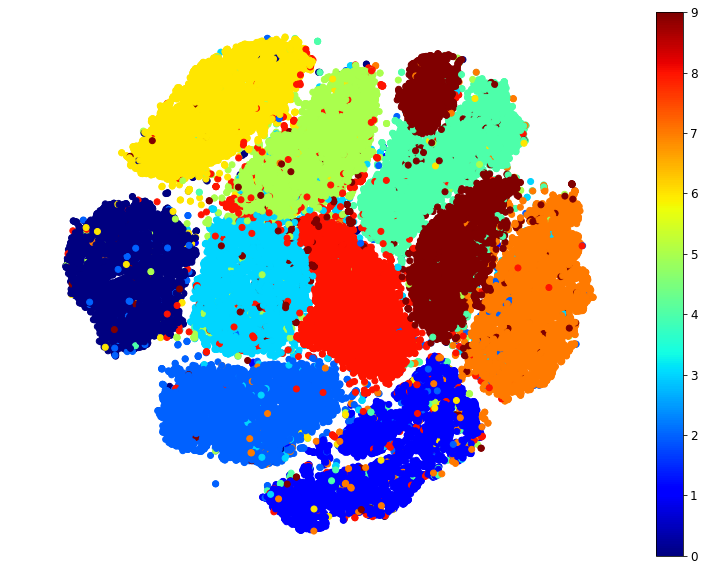

In [5]:
plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

Wow, this is pretty cool! This is so beautful! Isn't it great when data talks to you, when it explains to you what it is, when it let's you look at it in all its beauty. Man, this is really cool.

Let's create a plot_digits() function that will draw a scatterplot (similar to the above scatterplots) plus write colored digits, with a minimum distance guaranteed between these digits. If the digit images are provided, they are plotted instead. This implementation was inspired from one of Scikit-Learn's excellent examples (plot_lle_digits, based on a different digit dataset).

In [16]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = matplotlib.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=cmap(digit / 9))
    plt.axis("off")
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(np.array(neighbors) - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

Let's try it! First let's just write colored digits:

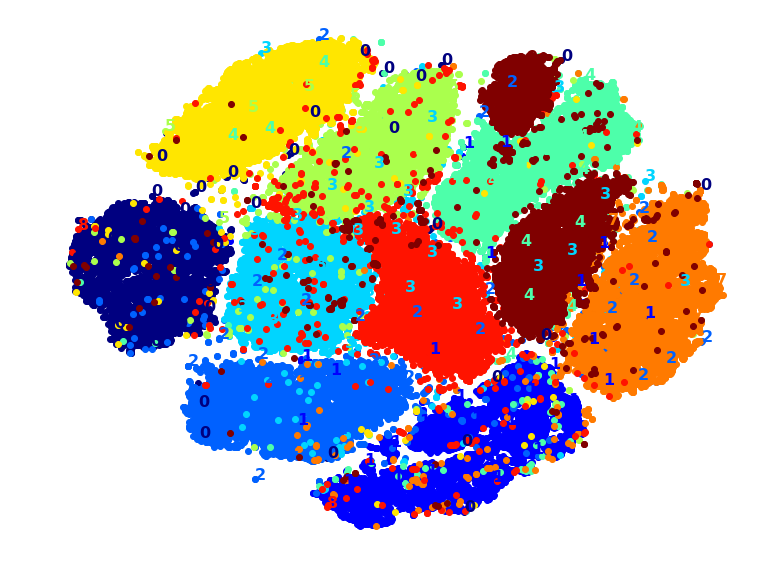

In [7]:
plot_digits(X_reduced, y)

Well that's okay, but not that beautiful. Let's try with the digit images:

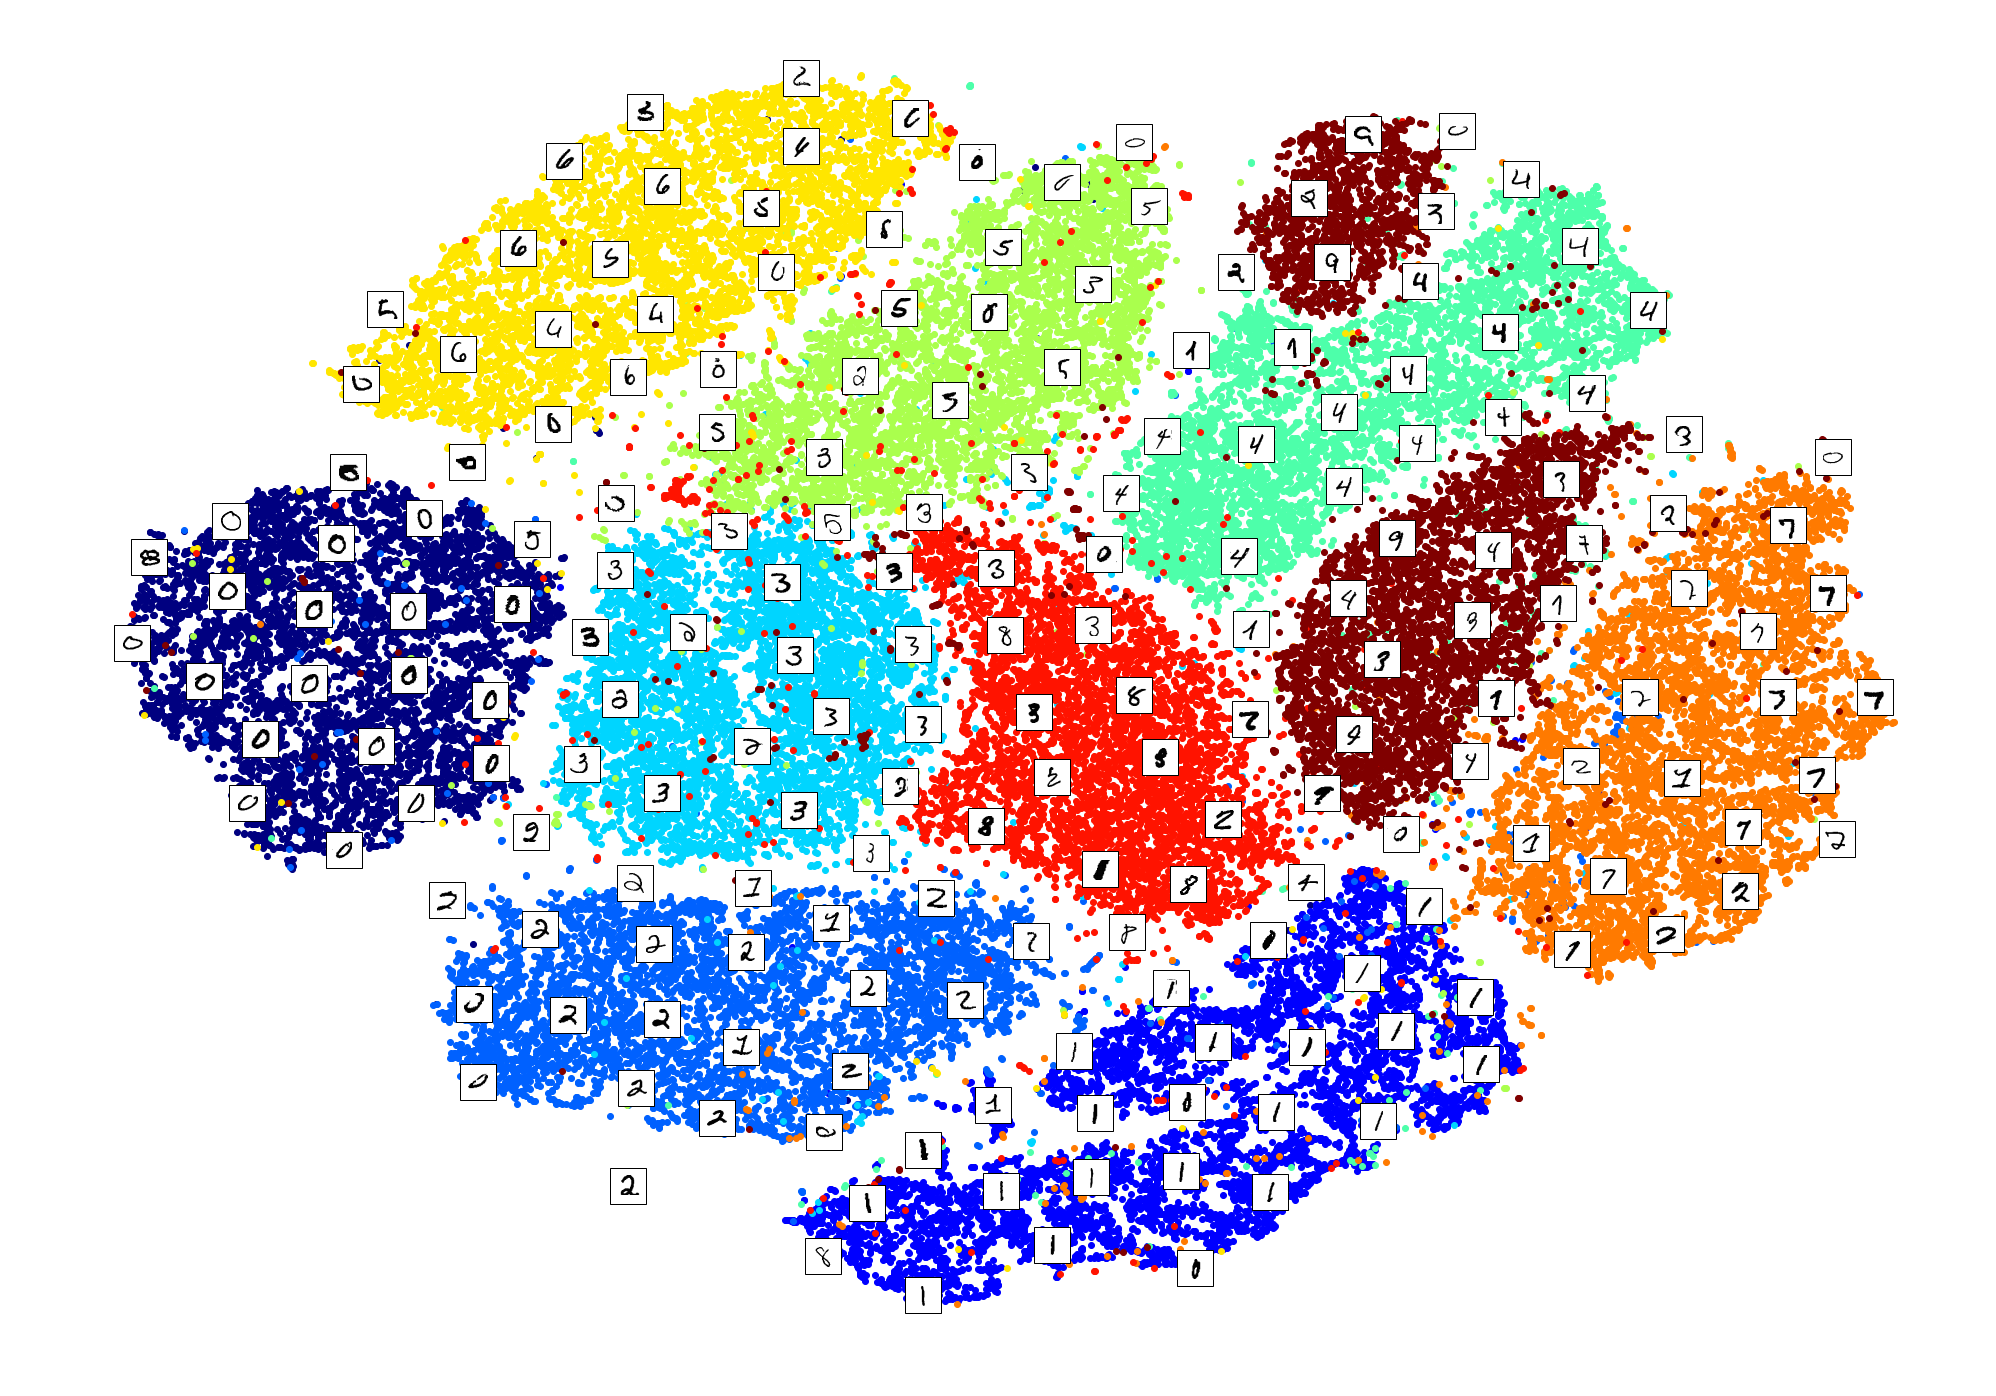

In [8]:
plot_digits(X_reduced, y, images=X, figsize=(35, 25))

Numbers that are clustered close to each other are hard to distinguish. Numbers that are clustered far apart from each otehr other are easier to distinguish. That's pretty cool.

Plot scaled-down versions of the digit images themselves.

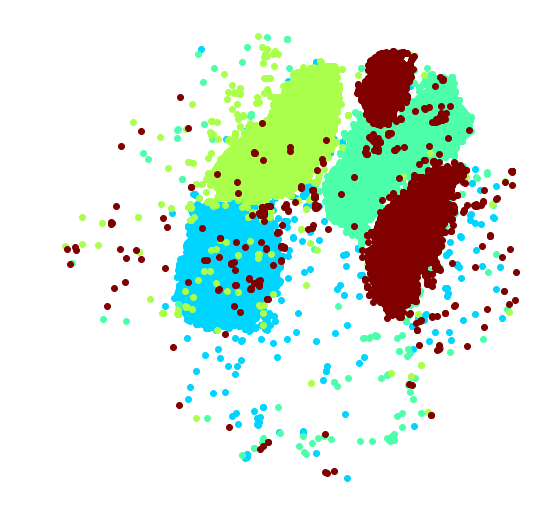

In [9]:
# Let's nail down the numbers of interest. 4 and 9 look the same. 3 and 5 look the same.

plt.figure(figsize=(9,9))
cmap = matplotlib.cm.get_cmap("jet")
for digit in (3, 4, 5, 9):
    plt.scatter(X_reduced[y == digit, 0], X_reduced[y == digit, 1], c=cmap(digit / 9))
plt.axis('off')
plt.show()

Let's see if we can produce a nicer image by running t-SNE on these 4 digits:

In [10]:
idx = (y == 3) | (y == 4) | (y == 5) | (y == 9) 
X_subset = X[idx]
y_subset = y[idx]

tsne_subset = TSNE(n_components=2, random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)

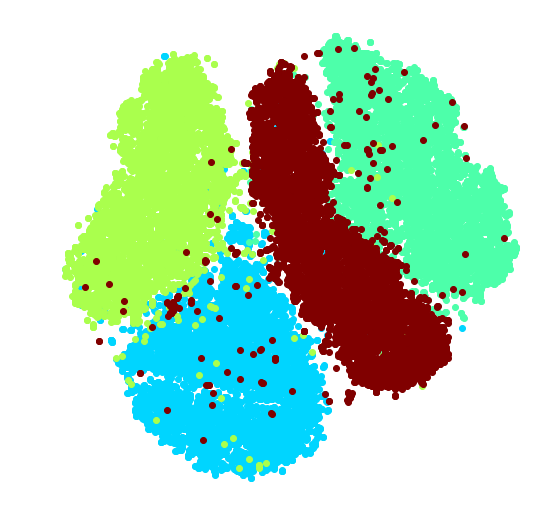

In [12]:
plt.figure(figsize=(9,9))
for digit in (3, 4, 5, 9):
    plt.scatter(X_subset_reduced[y_subset == digit, 0], X_subset_reduced[y_subset == digit, 1], c=cmap(digit / 9))
plt.axis('off')
plt.show()

Wow, this is actually much better compared to the previous graph. We can see clear clustering for each of the numbers. It seems like number 9 gets misclassified a lot as can be seen in a great number of dark brown brick dots in cluster 4 and cluster 3, not so much in cluster 5. We can also conclude a good number of 5s are misclassified as 3s as can be seen from the presence of rich green color dots in light blue cluster of 5s.

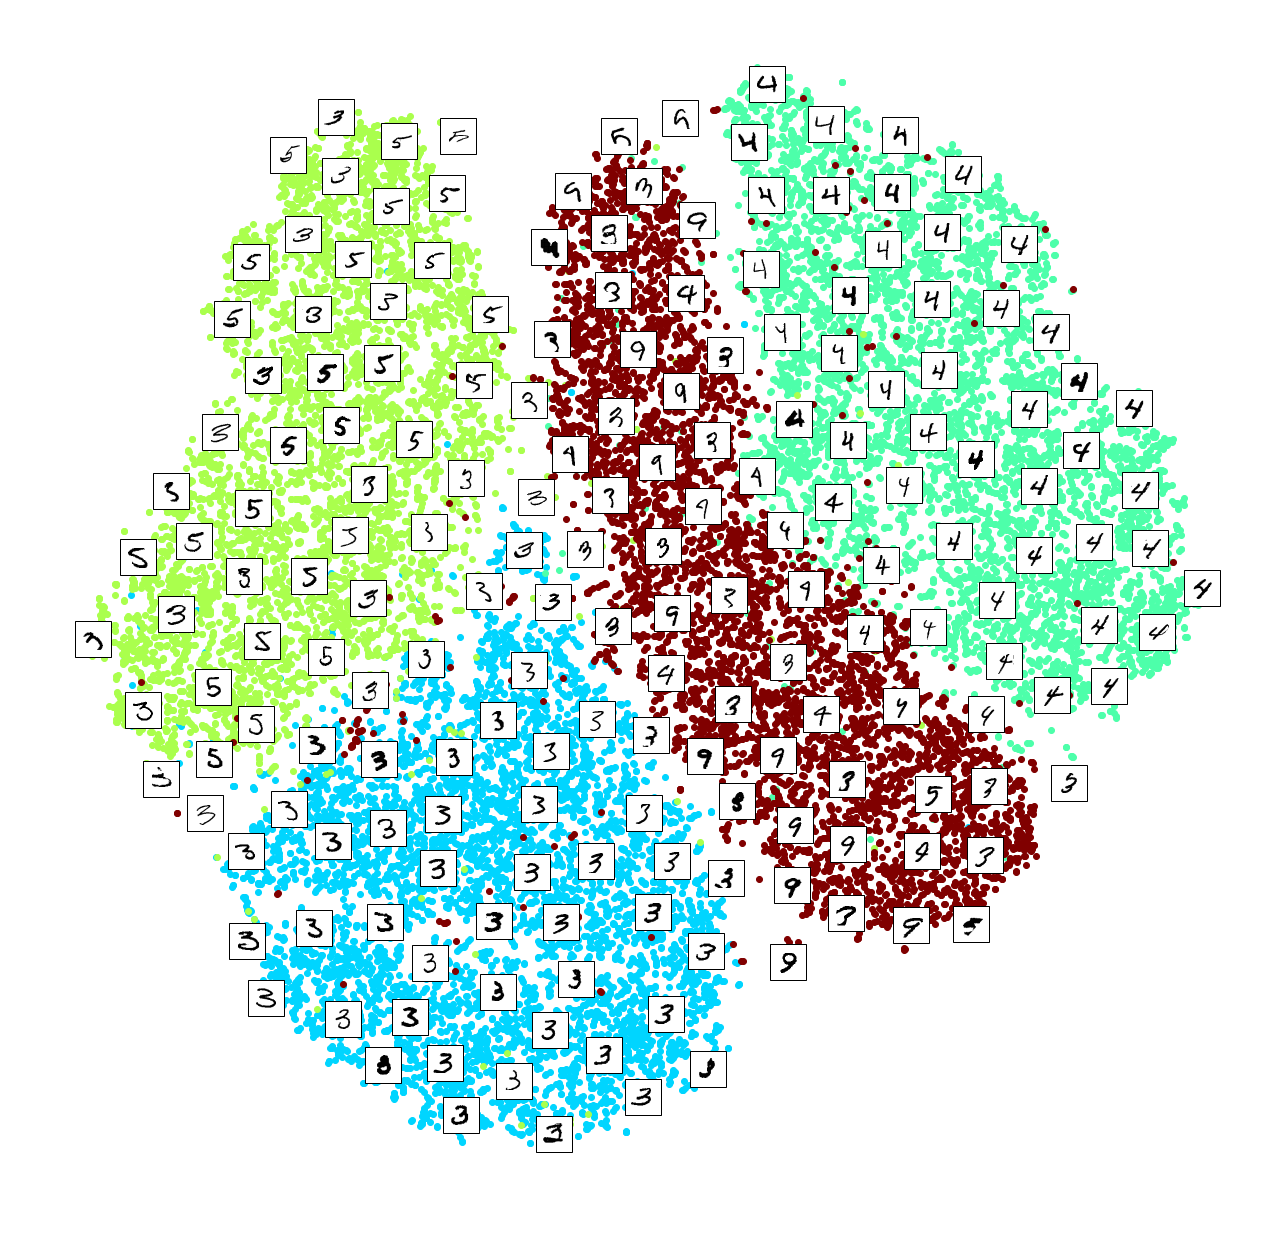

In [13]:
plot_digits(X_subset_reduced, y_subset, images=X_subset, figsize=(22, 22))

In [2]:
from sklearn.decomposition import PCA

Models below take too long to run on the whole MNIST dataset. From this point onwards, we are going to be using a reduced dataset.

In [14]:
np.random.seed(42)

m = 10000
idx = np.random.permutation(60000)[:m]

X = mnist['data'][idx]
y = mnist['target'][idx]

PCA took 0.7s.


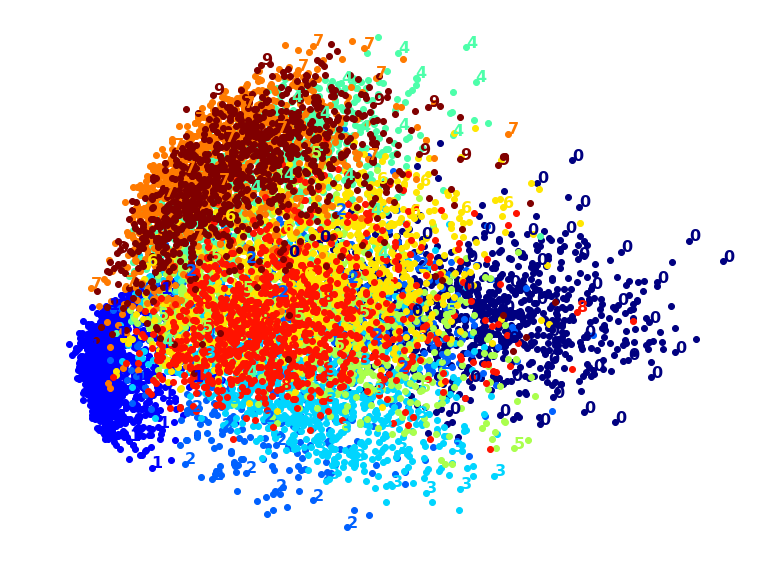

In [17]:
# PCA

import time

t0 = time.time()
X_pca_reduced = PCA(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("PCA took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_reduced, y)
plt.show()

Wow, PCA is blazingly fast! But although we do see a few clusters, there's way too much overlap. Let's try LLE:

In [18]:
from sklearn.manifold import LocallyLinearEmbedding

LLE took 174.6s.


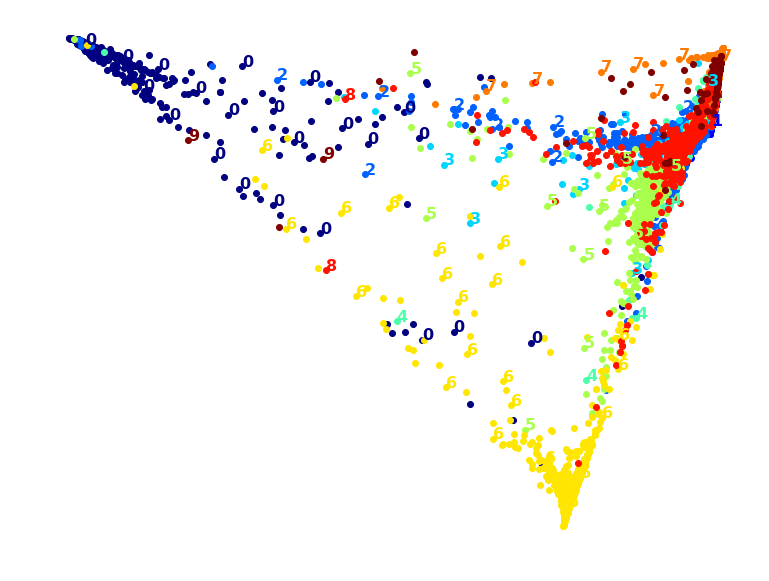

In [19]:
# LLE

t0 = time.time()
X_lle_reduced = LocallyLinearEmbedding(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("LLE took {:.1f}s.".format(t1 - t0))
plot_digits(X_lle_reduced, y)
plt.show()

That took a while, and the result does not look too good. Let's see what happens if we apply PCA first, preserving 95% of the variance:

PCA+LLE took 50.5s.


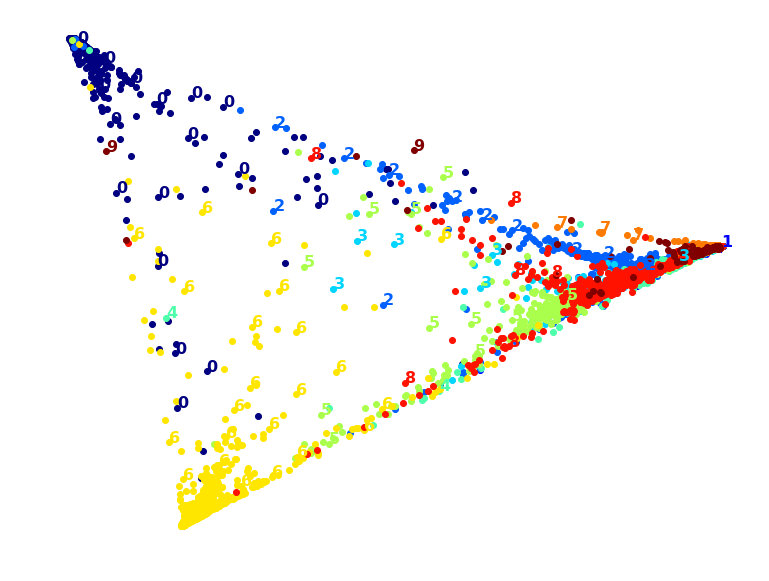

In [20]:
from sklearn.pipeline import Pipeline

pca_lle = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("lle", LocallyLinearEmbedding(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_lle_reduced = pca_lle.fit_transform(X)
t1 = time.time()
print("PCA+LLE took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_lle_reduced, y)
plt.show()

The result is more or less the same, but this time it was almost 3× faster.

Let's try MDS. It's much too long if we run it on 10,000 instances, so let's just try 2,000 for now:

MDS took 137.1s (on just 2,000 MNIST images instead of 10,000).


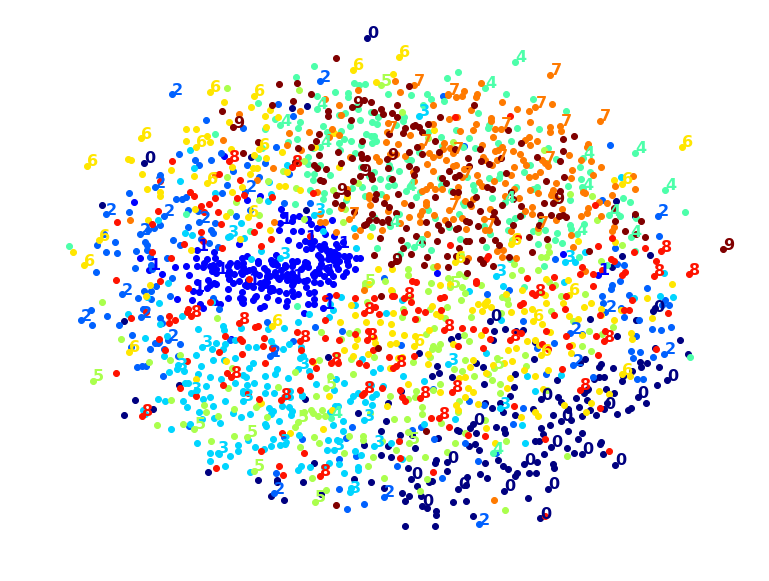

In [26]:
# MDS

from sklearn.manifold import MDS

m = 2000
t0 = time.time()
X_mds_reduced = MDS(n_components=2, random_state=42).fit_transform(X[:m])
t1 = time.time()
print("MDS took {:.1f}s (on just 2,000 MNIST images instead of 10,000).".format(t1 - t0))
plot_digits(X_mds_reduced, y[:m])
plt.show()

In [29]:
plot_digits(X_mds_reduced, y[:m], images=X, figsize=(35, 25))
plt.show()

Meh. This does not look great, all clusters overlap too much. Let's try with PCA first, perhaps it will be faster?

In [30]:
from sklearn.pipeline import Pipeline

pca_mds = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("mds", MDS(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_mds_reduced = pca_mds.fit_transform(X[:m])
t1 = time.time()
print("PCA+MDS took {:.1f}s (on 2,000 MNIST images).".format(t1 - t0))
plot_digits(X_pca_mds_reduced, y[:m])
plt.show()

PCA+MDS took 153.2s (on 2,000 MNIST images).


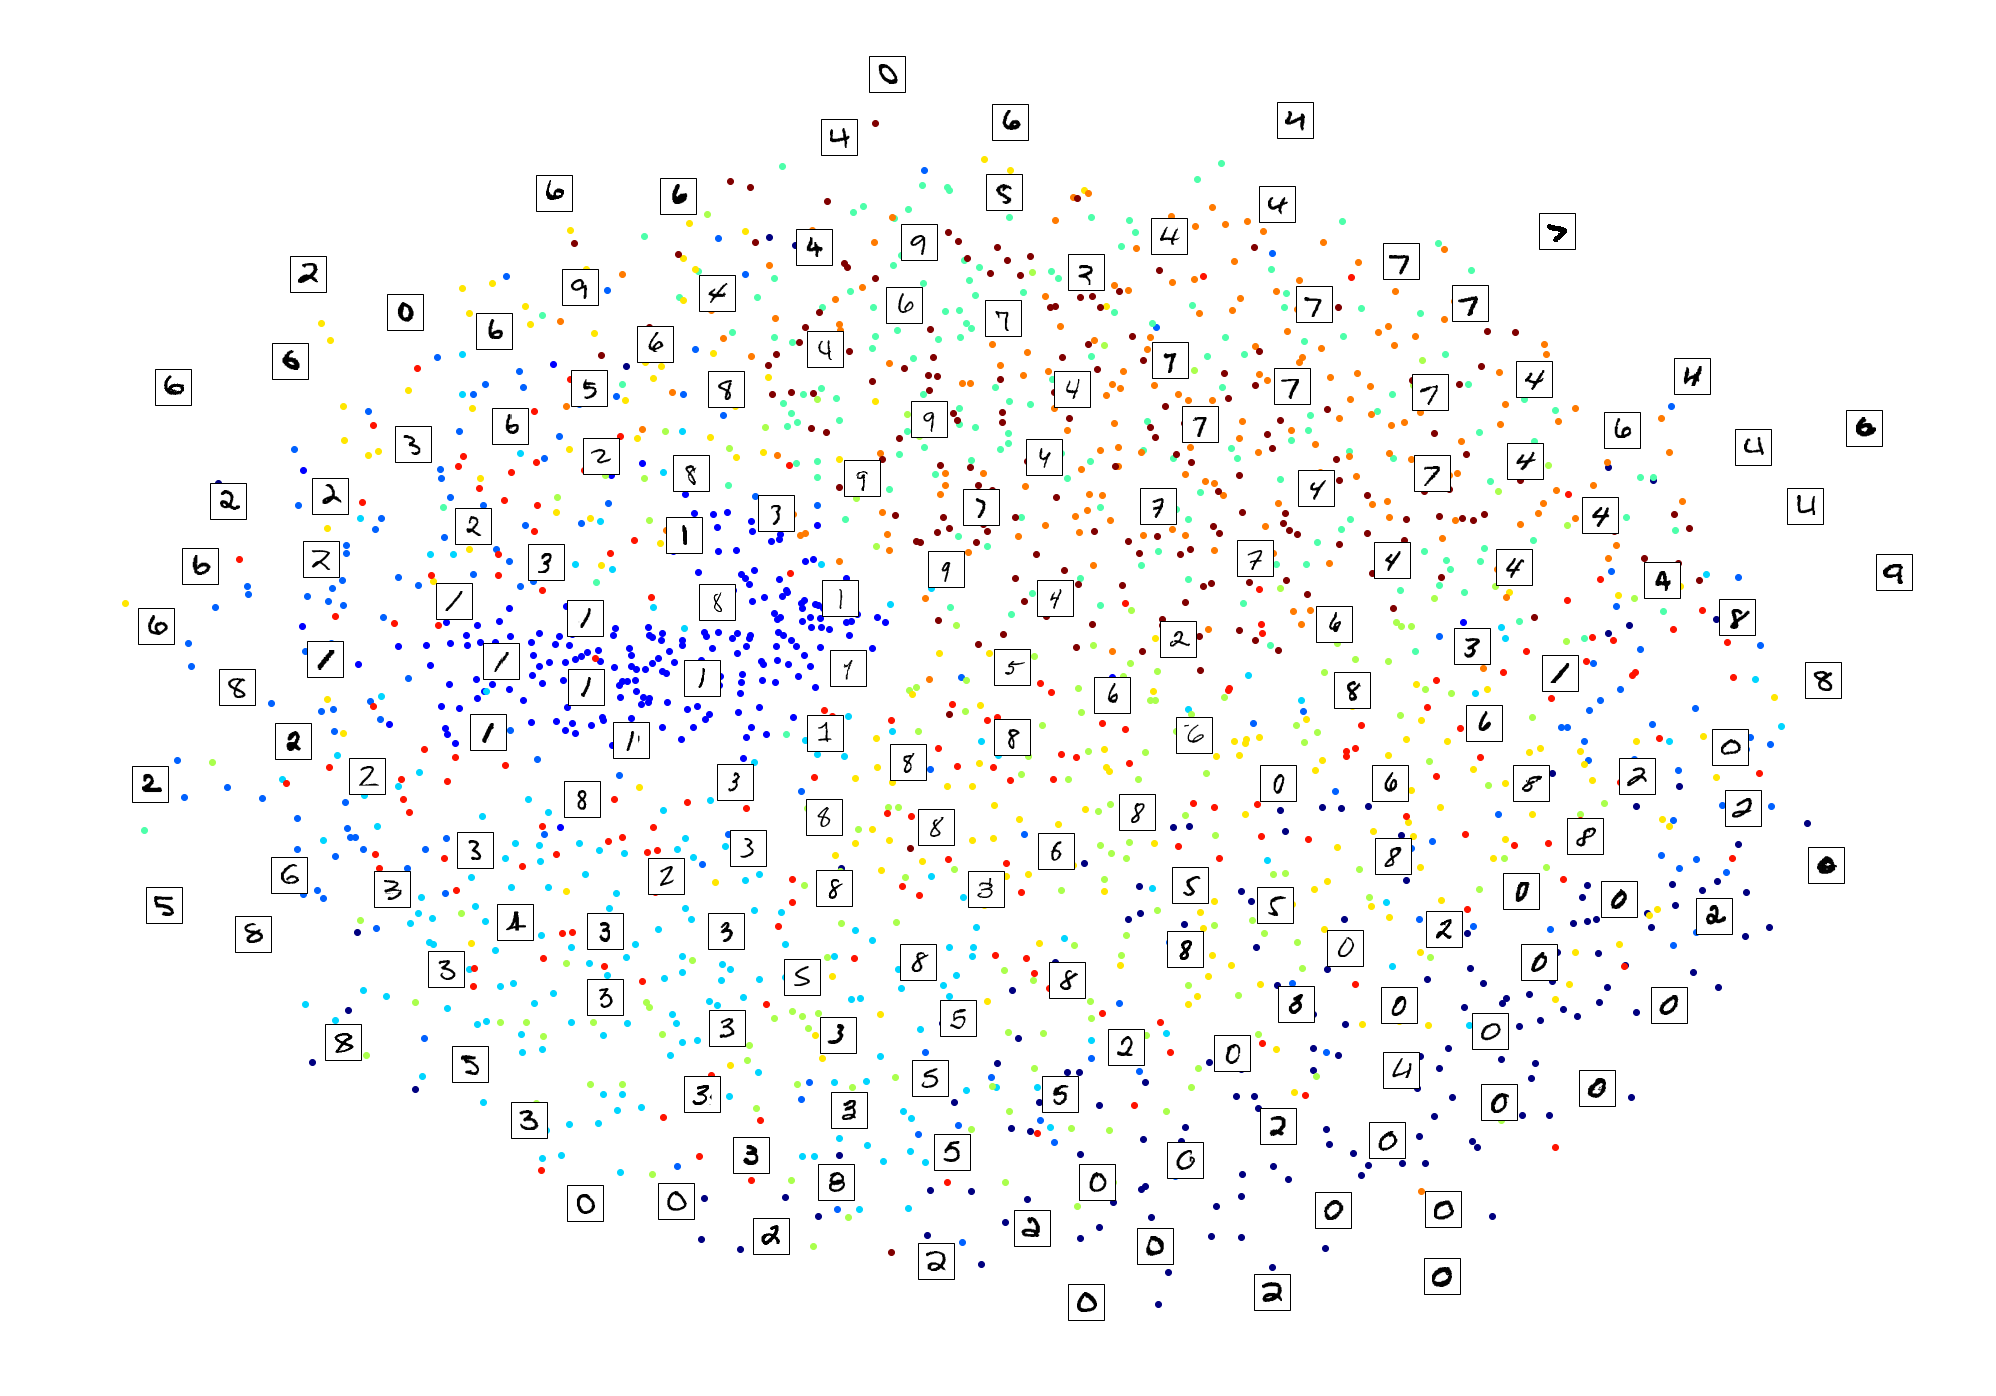

In [31]:
plot_digits(X_pca_mds_reduced, y[:m], images=X, figsize=(35, 25))
plt.show()

Same result, and no speedup: PCA did not help (or hurt).

Let's try LDA:

/home/isaac/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA took 2.6s.


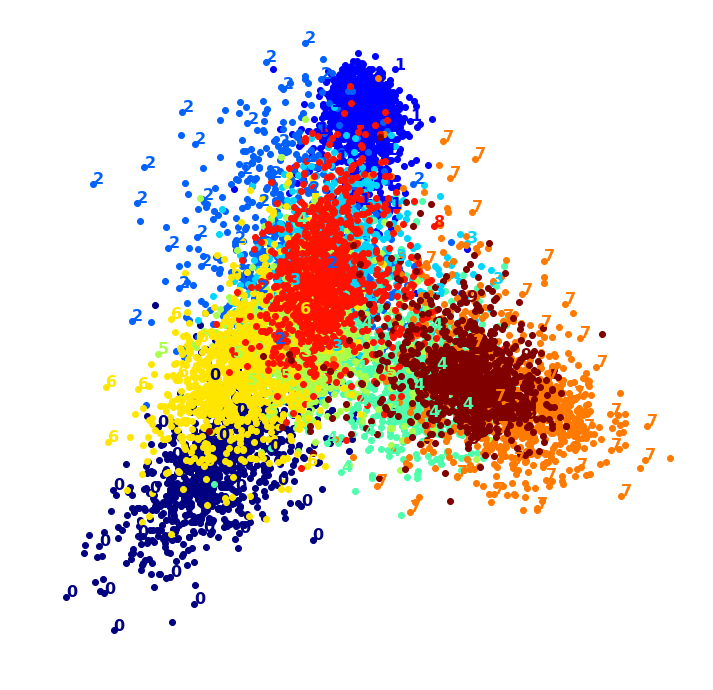

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

t0 = time.time()
X_lda_reduced = LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)
t1 = time.time()
print("LDA took {:.1f}s.".format(t1 - t0))
plot_digits(X_lda_reduced, y, figsize=(12,12))
plt.show()

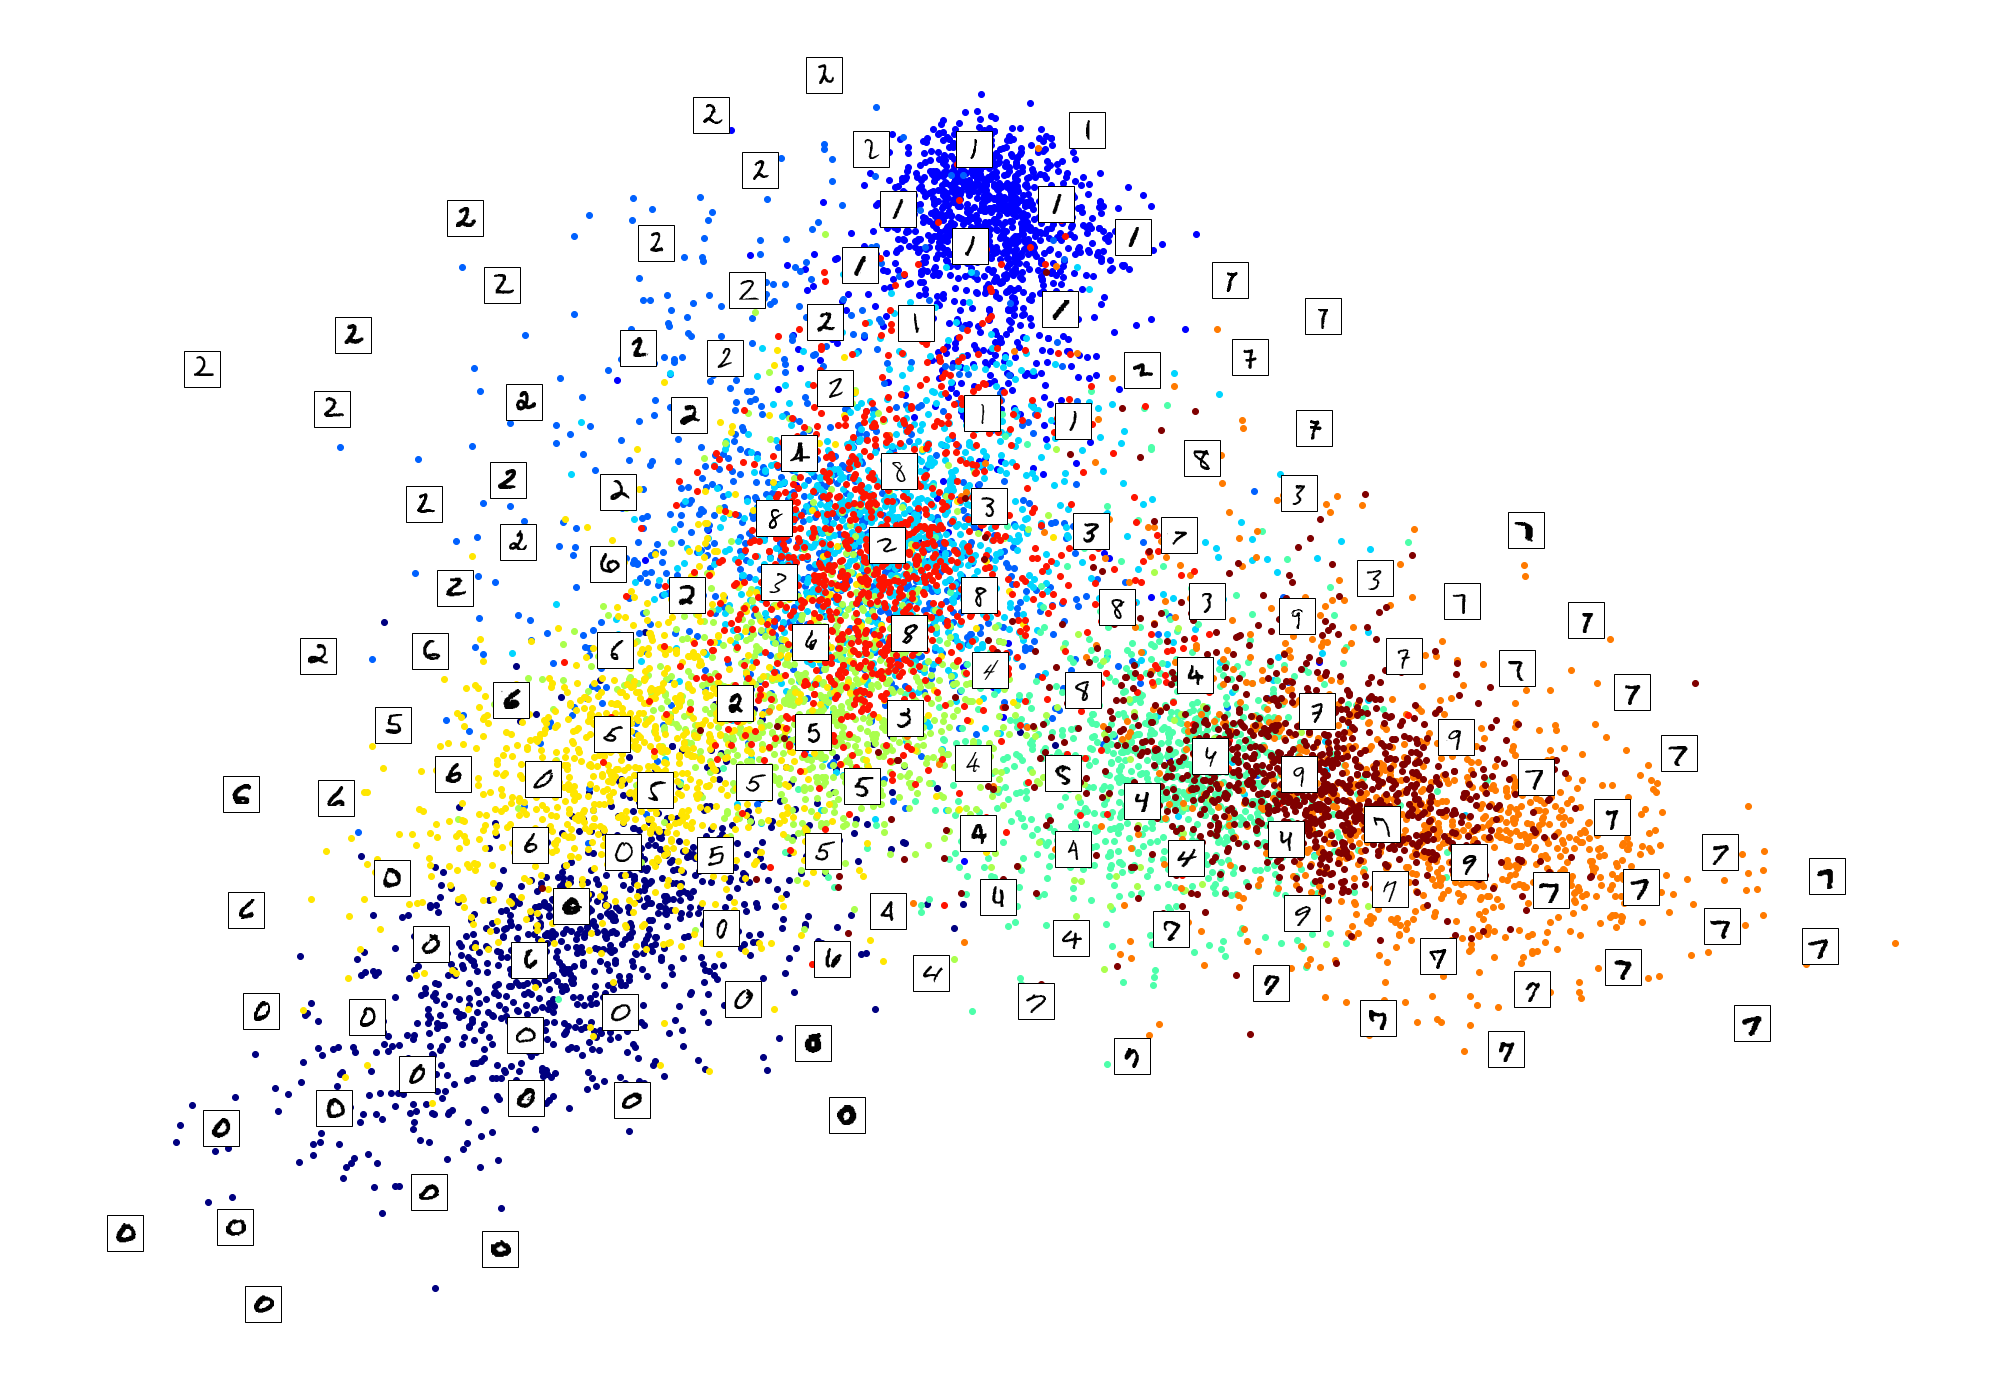

In [34]:
plot_digits(X_lda_reduced, y, images=X, figsize=(35, 25))
plt.show()

This one is very fast, and it looks nice at first, until you realize that several clusters overlap severely.

Well, it's pretty clear that t-SNE won this little competition, wouldn't you agree? We did not time it, so let's do that now:

In [35]:
from sklearn.manifold import TSNE

t0 = time.time()
X_tsne_reduced = TSNE(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("t-SNE took {:.1f}s.".format(t1 - t0))
plot_digits(X_tsne_reduced, y)
plt.show()

t-SNE took 367.5s.


In [36]:
plot_digits(X_tsne_reduced, y, images=X, figsize=(35, 25))
plt.show()

It's twice slower than LLE, but still much faster than MDS, and the result looks great. Let's see if a bit of PCA can speed it up:

In [37]:
pca_tsne = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("tsne", TSNE(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_tsne_reduced = pca_tsne.fit_transform(X)
t1 = time.time()
print("PCA+t-SNE took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_tsne_reduced, y)
plt.show()

PCA+t-SNE took 242.5s.


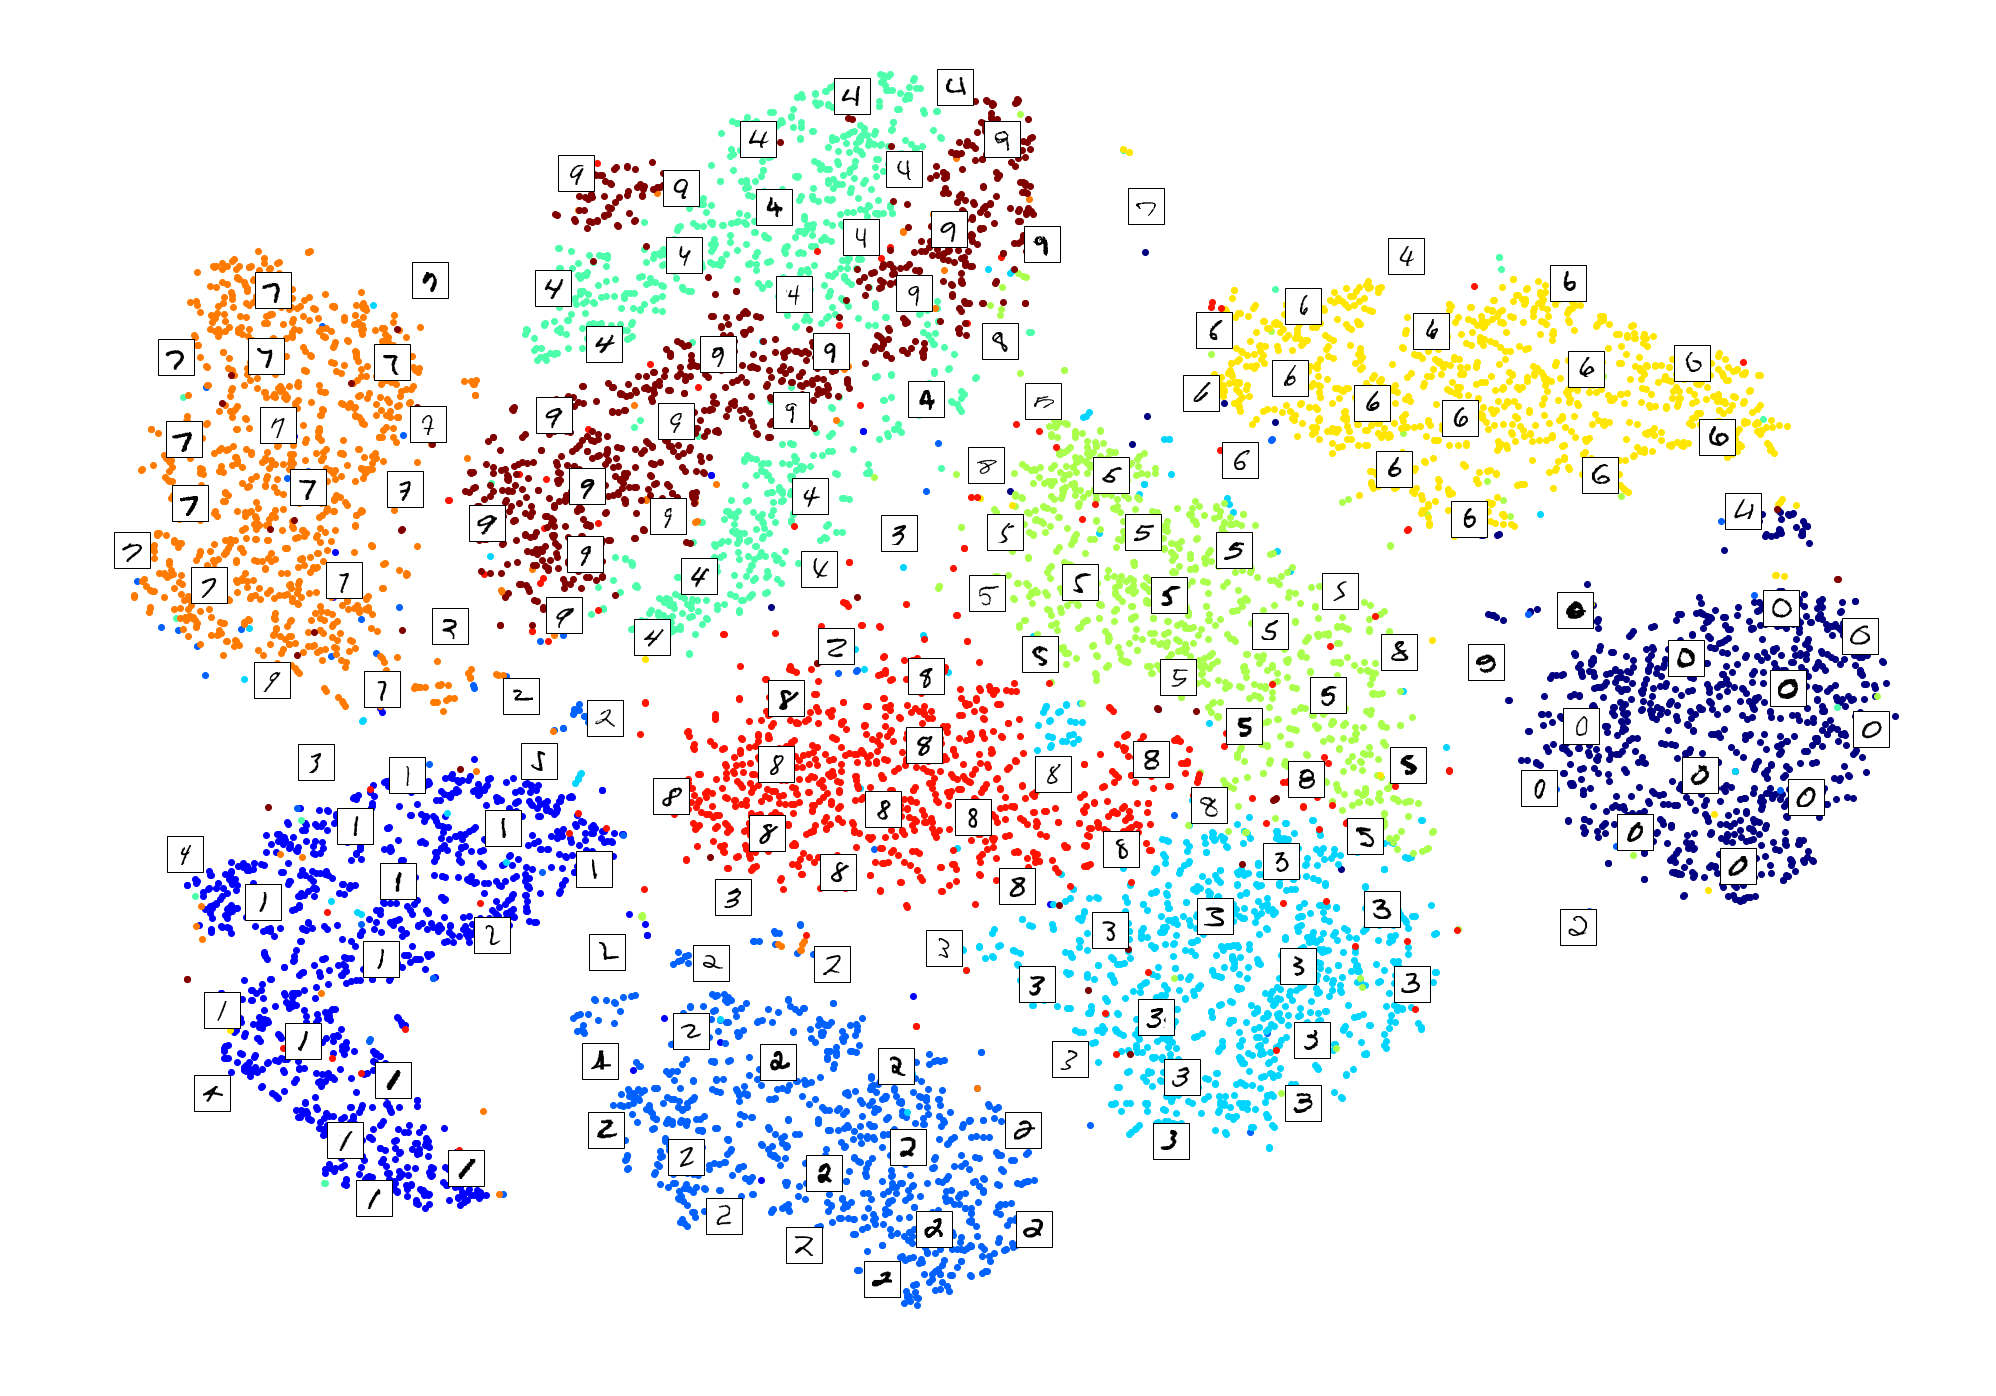

In [38]:
plot_digits(X_pca_tsne_reduced, y, images=X, figsize=(35, 25))
plt.show()

Wow, it is actually nearly 1.3x times faster than without the PCA. This is pretty cool.

[Optional] Read
https://marckhoury.github.io/counterintuitive-properties-of-high-dimensional-space/

Summary your most interesting finding

1) The size of the radius of the inner sphere is growing as the dimension increases because the distance to the corner increases while the radius of the corner sphere remains constant. The radius of the inner sphere is growing at a rate of (SQRT(d)/2 - 1/2). This is pretty cool. So, let's work with 2 dimensions. The radius of the inner sphere is SQRT(2)/2 - 1/2 while the radius of the outside sphere is 1/2. Let's
move to 3 dimensions. The radius of the inner spehere is SQRT(3)/2 - 1/2 (= 0.366025404) while the radius of the outside sphere is 1/2. Now,
let's move to 4 dimensions. The radius of the inner spehere is SQRT(4)/2 - 1/2 (= 0.5) while the radius of the outside sphere is 1/2. This
is getting interesting. Let's move to 5 dimensions. The radius of the inner spehere is SQRT(4)/2 - 1/2 (= 0.618033989) while the radius of the outside sphere is 1/2. Wow, this is strange! A radius of the inner sphere is greater than that of the outside sphere at the edge. Strange things
happen in upper dimensions. Therefore, in dimensions two and three, the sphere is strictly inside the cube, as we’ve seen in the figures above. However in four dimensions something very interesting happens. The radius of the inner sphere is exactly 1/2, which is just large enough for the inner sphere to touch the sides of the cube! In five dimensions, the radius of the inner sphere is 
0.618034, and the sphere starts poking outside of the cube! By ten dimensions, the radius is 1.08114 and the sphere is poking very far outside of the cube!

2) Next, a d-dimensional sphere with radius 1 has volume 0 when d is greater than 6. Weird, right? The volume of the unit d-sphere goes to 0 as 
d grows! A high dimensional unit sphere encloses almost no volume! The volume increases from dimensions one to five, but begins decreasing rapidly toward 0 after dimension six.

3) Concentration of Measure. In 2d, to capture 99% area of the uni sphere, we need a pretty big band. But, as d increases, the the size of the band decreases dramatically. In very high dimensional space nearly all of the surface area of the sphere lies a very small distance away from the equator! Remember, that a sphere must a satisfy a function where sum of the square of the coordinates equals 1. Therefore, as the number
of dimensions increases, the value of each of the coordinates gets closer to 0. 

4) Kissing Numbers. Consider a red unit circle in 2d. The kissing number of that red unit circle is 6 since there are 6 non-overlaping circles
that touch the red circle on all sides. The kissing number is the maximum number of non-overlapping blue circles that can simultaneously kiss the red circle. Blue circles have a unit radius. In 3d, the kissing number is 12. In fact, there are very few dimensions where we know the kissing number exactly. In most dimensions we only have an upper and lower bound on the kissing number, and these bounds can vary by as much as several thousand spheres! Isn't this rather interesting? Fantastic, I say fantastic it is! Man, I really want sushi.

Summary. In short, the kissing number in higher dimensions skyrockets and can't be precisely measured, the band to capture 99% of the data near the equator of the unit sphere shrinks significantly as d increases, volume of the unit sphere goes to 0 in higher dimensions, and the inner sphere located in unit square has an greater (and thus increasing radius) as d increases compared to the unit circles at the corners of the unit square.

### Submit your notebook

Submit your solution here
https://goo.gl/forms/VKD7Zwu54oHjutDc2
Make sure you rename your notebook to    
W3_UTORid.ipynb    
Example W3_adfasd01.ipynb
